# ROC (Receiver Operating Characteristic)

- A __receiver operating characteristic__ curve, or __ROC__ curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as __its discrimination threshold is varied__.

- The ROC curve is created by plotting the __true positive rate (TPR)__ against the __false positive rate (FPR)__ at various threshold settings. You can calculate TPR & FPR using Confusion Matrix.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [4]:
data = {
    'x': np.arange(1, 101),
    'y': np.array(
        [
            0,0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0,0, 
            0,0,0,0,0,0,0,0,0,0, 0,1,0,1,0,1,1,0,1,0, 1,1,1,0,0,1,0,1,1,0,
            1,1,1,1,1,1,1,1,1,1, 1,1,1,1,1,1,1,1,1,1, 1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1
        ]
    )
}
df = pd.DataFrame(data)
df.head()

,x,y
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


<hr>

### Contoh kasus pada Logistic Regression

In [5]:
model = LogisticRegression(solver='lbfgs')
model.fit(df[['x']], df['y'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
# model.predict_proba(df[['x']])
# [probability prediksi = 0, probability prediksi = 1]

In [7]:
df['proba'] = model.predict_proba(df[['x']])[:,1]
df

,x,y,proba
0,1,0,0.000129
1,2,0,0.000155
2,3,0,0.000186
3,4,0,0.000224
4,5,0,0.000269
5,6,0,0.000324
6,7,0,0.000389
7,8,0,0.000468
8,9,0,0.000563
9,10,0,0.000677


In [8]:
# membuat prediksi y" dengan threshold berbeda: 0.1 - 0.9

# for i in range(0.01, 1, 0.01): bakal error krn range float
for i in np.arange(0.0, 1.0, 0.001):
    df[f'y"{i}'] = df['proba'].apply(lambda x: 1 if (x > i) else 0)
df.head()

,x,y,proba,"y""0.0","y""0.001","y""0.002","y""0.003","y""0.004","y""0.005","y""0.006",...,"y""0.99","y""0.991","y""0.992","y""0.993","y""0.994","y""0.995","y""0.996","y""0.997","y""0.998","y""0.999"
0,1,0,0.000129,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0.000155,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0.000186,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0.000224,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0.000269,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Note

- By default, nilai threshold logistic regression = 0.5. Jika probability >0.5, maka diprediksi 1 & sebaliknya jika probability <0.5, diprediksi 0.

- Lihat prediksi untuk threshold = 0.5, nilainya sama persis sesuai data aktual.

<hr>

### Plot ROC Curve

- Untuk membuat ROC curve, dapat melalui confusion matrix untuk setiap prediksi (variasi threshold).

- Kemudian diplot nilai x __FPR (False Positive Rate)__ vs nilai y __TPR (True Positif Rate)__.

In [9]:
from sklearn.metrics import confusion_matrix

roc = []

for i in np.arange(0.0, 1.0, 0.001):
    # print(f'y"0.{i}')
    
    tn, fp, fn, tp = confusion_matrix(df['y'], df[f'y"{i}']).ravel()
    # print(tn, fp, fn, tp)

    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    # print(fpr, tpr)
    
    roc.append([fpr, tpr])

In [10]:
roc = np.array(roc)
roc

array([[1.        , 1.        ],
       [0.75510204, 1.        ],
       [0.69387755, 1.        ],
       ...,
       [0.        , 0.39215686],
       [0.        , 0.33333333],
       [0.        , 0.2745098 ]])

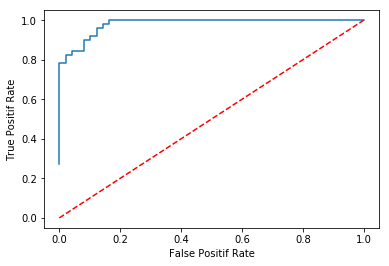

In [11]:
plt.plot(roc[:, 0], roc[:, 1])
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positif Rate')
plt.ylabel('True Positif Rate')
plt.show()

- Nilai threshold terbaik adalah yang memiliki FPR terendah, dengan TPR tertinggi.

- Dari plot di atas diketahui titik dg threshold terbaik adalah (0, 1), yang memiliki treshold 0.4, 0.5 & 0.6.

- Dari dataset juga diketahui bahwa threshold 0.4, 0.5 & 0.6 memiliki y prediksi yang sama dengan y aktual.

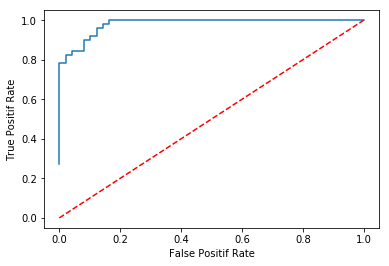

In [12]:
plt.plot(roc[:, 0], roc[:, 1])

# plt.plot([x1, x2], [y1, y2])
plt.plot([0, 1], [0, 1], 'r--')

# plt.annotate('Best\nthreshold', xy=(0, 1), xytext=(0.1, 0.7),
#     arrowprops=dict(facecolor='black', shrink=0.2),
#     # arrowprops = dict(arrowstyle = '<|-')
# )

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positif Rate')
plt.ylabel('True Positif Rate')
plt.show()

<hr>

### ROC AUC Using Sklearn

- Hitung manual = luas AUC (Area Under Curve) a.k.a area di bawah ROC curve

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

Text(0, 0.5, 'True Positif Rate')

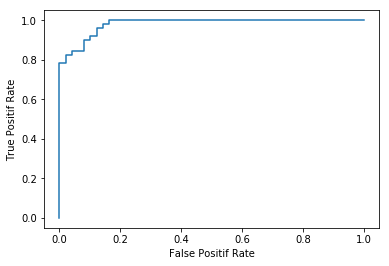

In [20]:
# plot ROC curve
fpr, tpr, threshold = roc_curve(df['y'], model.predict_proba(df[['x']])[:,1])

plt.plot(fpr, tpr, label=f'Threshold: {threshold}')
plt.xlabel('False Positif Rate')
plt.ylabel('True Positif Rate')

In [25]:
# ROC AUC score = luas AUC
roc_auc_score(df['y'], model.predict(df[['x']]))

0.8999599839935973

In [26]:
auc(fpr, tpr)

0.9807923169267707

In [29]:
a0 = 1.0
b0 = 1.0
a1 = 0.9910714285714286
b1 = 0.9583333333333335
a2 = 0.991304347826087
b2 = 0.9652173913043478
print((a0 + a1 + a2)/3)
print((b0 + b1 + b2)/3)

0.9941252587991718
0.9745169082125603
